In [22]:
#coding:utf-8
%matplotlib inline
'''
图像偏色检测
参考：https://blog.csdn.net/lydujing/article/details/50786043
https://www.cnblogs.com/Imageshop/p/3191853.html
'''
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

src = cv2.cvtColor(cv2.imread('datas/color_check.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [23]:
def rgb2lab_single(inputColor):
	RGB=[0,0,0]
	for i in range(0,len(inputColor)):
		RGB[i]=inputColor[i]/255.0

	X=RGB[0]*0.4124+RGB[1]*0.3576+RGB[2]*0.1805
	Y=RGB[0]*0.2126+RGB[1]*0.7152+RGB[2]*0.0722
	Z=RGB[0]*0.0193+RGB[1]*0.1192+RGB[2]*0.9505
	XYZ=[X,Y,Z]
	XYZ[0]/=95.045/100
	XYZ[1]/=100.0/100
	XYZ[2]/=108.875/100

	L=0
	for i in range(0,3):
		v=XYZ[i]
		if v>0.008856:
			v=pow(v,1.0/3)
			if i==1:
				L=116.0*v-16.0
		else:
			v*=7.787
			v+=16.0/116
			if i==1:
				L=903.3*XYZ[i]
		XYZ[i]=v

	a=500.0*(XYZ[0]-XYZ[1])
	b=200.0*(XYZ[1]-XYZ[2])
	Lab=[int(L),int(a),int(b)]
	return Lab

In [24]:
def rgb2lab(src):
    rows,cols = src.shape[0],src.shape[1]
    dst = np.zeros_like(src)
    for i in range(rows):
        for j in range(cols):
            rgb = list(src[i,j])
            dst[i,j] = rgb2lab_single(rgb)
    return dst

In [25]:
dst = rgb2lab(src)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

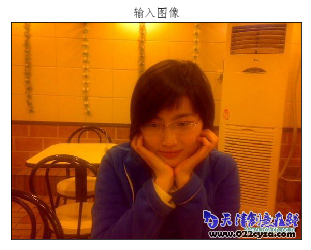

In [26]:
plt.imshow(src)
plt.title('输入图像')
plt.xticks([]),plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

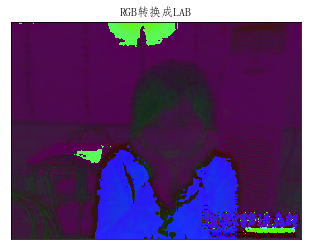

In [27]:
plt.imshow(dst)
plt.title('RGB转换成LAB')
plt.xticks([]),plt.yticks([])

In [28]:
'''
检测偏色
k值不大于1.5我们可以认为其整体图像偏色的可能性不大，
当然这个值取多少可能还是需要和实际情况结合的。
'''
def color_check(imglab):
    b_sum = 0.0
    a_sum = 0.0
    
    rows,cols = imglab.shape[0],imglab.shape[1]
    for i in range(rows):
        for j in range(cols):
            a_sum += imglab[i,j,1]
            b_sum += imglab[i,j,2]
            
    mn = rows * cols
    da = a_sum / mn - 128 # 归一化到[-128,127]范围
    db = b_sum / mn - 128
    
    # 平均色度
    d = np.sqrt(da * da + db * db)
    
    ma = 0.0
    mb = 0.0
    
    for i in range(rows):
        for j in range(cols):
            ma += np.abs(imglab[i,j,1] - 128 - da)
            mb += np.abs(imglab[i,j,2] - 128 - db)
    ma = ma / mn
    mb = mb / mn
    
    # 色度中心距
    m = np.sqrt(ma * ma + mb * mb)
    
    # 偏色因子
    k = d / m
    return k

In [30]:
k = color_check(dst)
print(k)

2.3551311177163923
